# Data Transformation 

In [3]:
# when data use heavily skewed we should do data transformation
# we need to make data normaly distributes , mainly in case of Linear/logistic regression

In [1]:
import pandas as pd 
import numpy as np
import scipy as stats 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# using titanic dataset

train = pd.read_csv("C:/Users/lenovo/python/EDA/train_titanic.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = train[['Age','Fare']]
data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


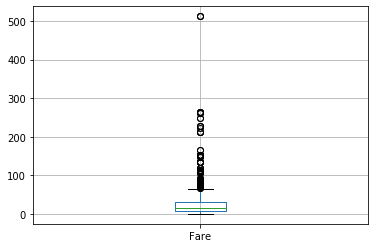

In [4]:
# find outliers
data.boxplot(column = 'Fare')

# so many outliers , we cant directly use this data

(array([ 17., 320., 129.,  53.,  43., 104.,  31.,  19.,   4.,  12.,  23.,
         16.,   6.,  12.,  10.,  19.,  10.,   8.,   2.,   0.,   2.,   6.,
          3.,   4.,   0.,   0.,   7.,   0.,   2.,   7.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,
          4.,   0.,   0.,   0.,   2.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
         25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
         51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
         76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
        102.46584 , 107.589132, 112.712424, 11

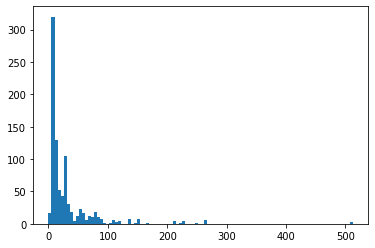

In [5]:
plt.hist(data['Fare'],bins=100)


# its positively skewed -- so we do log transform

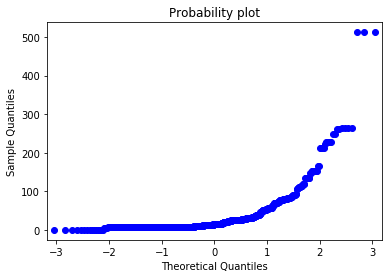

In [6]:
# Q-Q plot 
# Quantile plot is graphical plot to check id the data is distributr normally

# plt.subplot()
# sm.probplot(data['Fare'],plot= sns.mpl.pyplot)
# plt.show()


pplot = sm.ProbPlot(data['Fare'])
fig = pplot.qqplot()
h = plt.title("Probability plot")
plt.show()

In [7]:
# normal log transform

data_log = np.log(data +1)
data_log.head()

,Age,Fare
0,3.135494,2.110213
1,3.663562,4.280593
2,3.295837,2.188856
3,3.583519,3.990834
4,3.583519,2.202765


In [8]:
data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
data_log.describe()

,Age,Fare
count,714.000000,891.000000
mean,3.258874,2.962246
std,0.684043,0.969048
min,0.350657,0.000000
25%,3.050405,2.187218
50%,3.367296,2.737881
75%,3.663562,3.465736
max,4.394449,6.240917


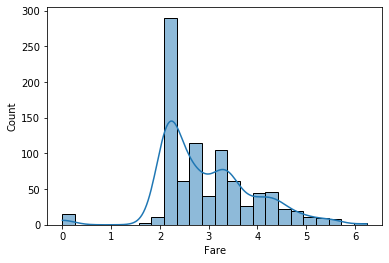

In [11]:
# now again check the distribution of the data 
sns.histplot(data_log['Fare'],kde =True)


# still there is some skeweness

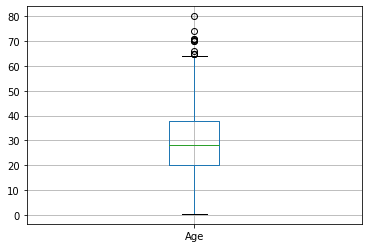

In [12]:
# for Age columns

data.boxplot(column='Age')

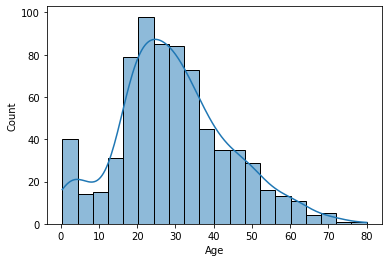

In [13]:
sns.histplot(data['Age'],kde=True)

In [14]:
# above very short tail ....
# lets see what after log transform ...


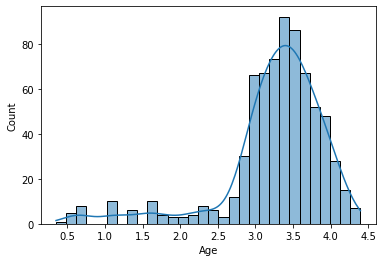

In [17]:
sns.histplot(data_log.Age,kde=True)

In [18]:
# so here its not useful .. 
# sqrt transform for 'Age' as below

In [19]:
data_sqrt = np.sqrt(data + 1)
data_sqrt.head()

,Age,Fare
0,4.795832,2.872281
1,6.244998,8.501959
2,5.196152,2.987474
3,6.000000,7.355270
4,6.000000,3.008322


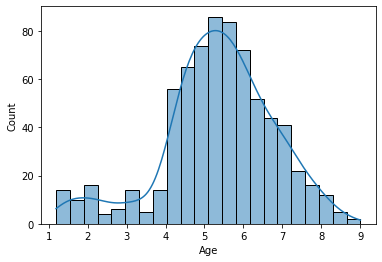

In [20]:
sns.histplot(data_sqrt.Age,kde=True)

In [22]:
# from above still its not normaly distributed so can check with other transformation methods

# One Hot Encoding

In [23]:
train = pd.read_csv("C:/Users/lenovo/python/EDA/train_titanic.csv")
test = pd.read_csv("C:/Users/lenovo/python/EDA/test_titanic.csv")


In [24]:
# categorical attributes that are not ordinal :
  # - Survived, Sex and Embarked
# categorical which are Ordinal:
  # - Pclass

In [26]:
# finding the most frequently occuring port
frequent_port = train['Embarked'].dropna().mode()[0]
frequent_port

'S'

# Scaling

In [28]:
# normalization / standerdization
# normlization - data in 0 to 1
# eg. Age and Salary both has diff range of data ,,,,so we do normlize

# outliers should be treated before normalization else presence of outlier will increase


In [29]:
train = pd.read_csv("C:/Users/lenovo/python/EDA/train_titanic.csv")
data = train[['Age','Fare']]
data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [39]:
data['Normlized_age'] =(data['Age'] - data['Age'].min())/(data['Age'].max()-data['Age'].min())

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
print("Minimum", data['Normlized_age'].min())
print('MAximum',data.Normlized_age.max())

Minimum 0.0
MAximum 1.0


# Binning

In [42]:
# binning can be used for both Categorical and Numerical
# benifit to avoid Overfit

In [43]:
train = pd.read_csv("C:/Users/lenovo/python/EDA/train_titanic.csv")
test = pd.read_csv("C:/Users/lenovo/python/EDA/test_titanic.csv")


In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# check the original distributation


# ************binning on categorical column 'Name'(Title)

# extracting titles from name
title_test = train.Name.str.extract('([A-Za-z]+)\.',expand = False)
pd.DataFrame(title_test.value_counts())

,Name
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Major,2
Mlle,2
Ms,1


In [46]:
# creating title column from Name columns - extracting titels from string 
data = [train,test]
titles = {'Mr':1, 'Miss':2,'Mrs':3,"Master":4,'Other':5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['Title'].replace(['Mile','Mme','Ms','Dr','Major','Lady'])
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    #filling NaN with 0, to get safe
    dataset['Title']= dataset['Title'].fillna(0)

In [47]:
# again check the distribution
pd.DataFrame(train.Title.value_counts())

,Title
1.0,517
2.0,182
3.0,125
4.0,40
0.0,27


In [ ]:
# ********** now on numerical column - binning

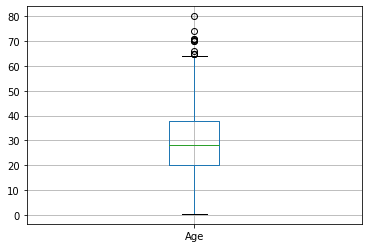

In [48]:

train.boxplot(column=['Age'])

In [54]:
# combine train and test - this will add new column with index train and test  
data_train_test = pd.concat([train.assign(ind='train'),test.assign(ind='test')],ignore_index=True)
data_train_test.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
ind               0
dtype: int64

In [56]:
# # finding the position where null in age 
# age_nan_pos = data_train_test[data_train_test['Age'].isnull()].index   
# for i in age_nan_pos:
#     mean_age = data_train_test["Age"][((data_train_test['Title']==data_train_test.iloc[i]["Title"]))]
#     data_train_test['Age'].iloc[i]=mean_age

In [57]:
#seprating train and test again based on ind new column
test,train= data_train_test[data_train_test['ind'].eq('test')],data_train_test[data_train_test['ind'].eq('train')]

In [59]:
# coverting age int to category - bins/groups
data = [train,test]

train["Age"] = train['Age'].astype(int)
train.loc[train['Age'] <=15,'Age']=0
train.loc[(train['Age']>15) & (train['Age']<=30),'Age']=1
train.loc[(train['Age']>30) & (train['Age']<=45),'Age']=2
train.loc[(train['Age']>45) & (train['Age']<=60),'Age']=3
train.loc[train['Age'] >60,'Age']=4

test["Age"] = test['Age'].astype(int)
test.loc[test['Age'] <=15,'Age']=0
test.loc[(test['Age']>15) & (test['Age']<=30),'Age']=1
test.loc[(test['Age']>30) & (test['Age']<=45),'Age']=2
test.loc[(test['Age']>45) & (test['Age']<=60),'Age']=3
test.loc[test['Age'] >60,'Age']=45

ValueError: Cannot convert non-finite values (NA or inf) to integer